In [4]:
import requests
import s3fs
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np 
import matplotlib.pyplot as plt
from helpers import *


In [5]:
s3=s3_connection()

connection successful


1. Revenus par habitant et population par commune

In [ ]:
columns_to_select = ["codecommune", "nomcommune", "pop2022", "revmoy2022"]
dtype_spec = {'codecommune': 'str'}

path_revcommunes = "clichere/diffusion/revcommunes.csv"
revcommunes = s3.read_csv_from_s3(path_revcommunes, columns_to_select, dtype_spec)

print(revcommunes.head())

print(revcommunes.describe())

  codecommune             nomcommune  pop2022  revmoy2022
0       01001  ABERGEMENT-CLEMENCIAT      747   21615.654
1       01002    ABERGEMENT-DE-VAREY      288   16945.766
2       01004      AMBERIEU-EN-BUGEY    14375   18423.111
3       01005    AMBERIEUX-EN-DOMBES     1717   20996.125
4       01006                AMBLEON      116   18075.986
            pop2022     revmoy2022
count  3.666100e+04   34746.000000
mean   1.925007e+03   17051.483011
std    1.495215e+04    5197.378499
min    0.000000e+00    3350.483900
25%    1.820000e+02   14012.091750
50%    4.290000e+02   16322.690500
75%    1.118000e+03   19126.264250
max    2.118266e+06  126903.910000


2. Taux de diplome par commune

In [ ]:
columns_to_select = ["codecommune","pbac2022", "psup2022"]
dtype_spec = {'codecommune': 'str'}

path_dipcommunes = "clichere/diffusion/diplomescommunes.csv"
dipcommunes = s3.read_csv_from_s3(path_dipcommunes, columns_to_select, dtype_spec)

print(dipcommunes.head())

print(dipcommunes.describe())


  codecommune  pbac2022  psup2022
0       01001  0.447140  0.232236
1       01002  0.672414  0.086207
2       01003       NaN       NaN
3       01004  0.461044  0.289937
4       01005  0.337925  0.168558
           pbac2022      psup2022
count  35222.000000  35222.000000
mean       0.460833      0.274160
std        0.199317      0.174347
min        0.000000      0.000000
25%        0.333333      0.157895
50%        0.451748      0.259494
75%        0.575221      0.372092
max        1.000000      1.000000


3. Fusionner les bases de données

In [8]:
rev_dip_pop_comm = pd.merge(revcommunes, dipcommunes, on='codecommune', how='inner')


print(rev_dip_pop_comm)

      codecommune             nomcommune  pop2022  revmoy2022  pbac2022  \
0           01001  ABERGEMENT-CLEMENCIAT      747   21615.654  0.447140   
1           01002    ABERGEMENT-DE-VAREY      288   16945.766  0.672414   
2           01004      AMBERIEU-EN-BUGEY    14375   18423.111  0.461044   
3           01005    AMBERIEUX-EN-DOMBES     1717   20996.125  0.337925   
4           01006                AMBLEON      116   18075.986  1.000000   
...           ...                    ...      ...         ...       ...   
36627       95676     VILLERS-EN-ARTHIES      529   20655.250  0.533520   
36628       95678          VILLIERS-ADAM      927   26113.932  0.891641   
36629       95680        VILLIERS-LE-BEL    27033   11837.685  0.436124   
36630       95682        VILLIERS-LE-SEC      248   18516.314  0.270115   
36631       95690    WY-DIT-JOLY-VILLAGE      375   25304.949  0.871795   

       psup2022  
0      0.232236  
1      0.086207  
2      0.289937  
3      0.168558  
4      0.

5. Création d'une nouvelle variable

In [15]:
final_dataset['freq_par_hab']= final_dataset['total_voyageurs_2022']/final_dataset['pop2022']
print(final_dataset.head())

   total_voyageurs_2022               nom_gare       uic codeinsee  lon_gare  \
0                 40825               Abbaretz  87481614     44001 -1.524416   
1                177092  Achères Grand Cormier  87386052     78551  2.091903   
2                 80648        Achiet-le-Grand  87342048     62005  2.780168   
3                 32800                   Agay  87757559     83118  6.856500   
4                 11325          Aigues-Mortes  87775858     30003  4.191210   

    lat_gare codecommune             nomcommune  pop2022  revmoy2022  \
0  47.554643       44001               ABBARETZ   2257.0   12567.249   
1  48.955183       78551  SAINT-GERMAIN-EN-LAYE  39172.0   41601.988   
2  50.131752       62005        ACHIET-LE-GRAND    888.0   15813.034   
3  43.431370       83118          SAINT-RAPHAEL  37114.0   26637.975   
4  43.570901       30003          AIGUES-MORTES   8076.0   20798.898   

   pbac2022  psup2022  dist_closest_station_km  nb_stations_same_commune  \
0  0.27279

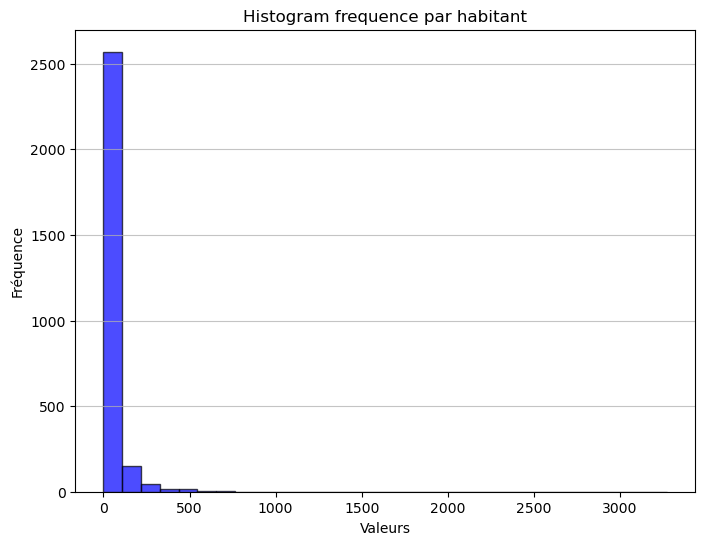

In [16]:
plot_hist(series=(final_dataset['freq_par_hab']),title_suffix="frequence par habitant")